# Homework Assignment 4 - [30 points]


In this analysis, we will perform two case studies.
<hr>


<hr>

## <u>Case Study 1</u>: Wheat Seed Analysis Continued

Suppose that you are biologist working for an agricultural company. Specifically, you would like to learn more about some of the biological properties of three types of wheat seeds: Kama wheat seeds, Canadian wheat seeds, and Rosa wheat seeds.

The attached seeds.csv contains seven numerical attributes for 70 Kama seeds, 70 Canadian seeds, and 70 Rosa seeds. In this analysis we would like to answer the following research questions.

### <u>Research Questions</u>:

1. Does there exist a clustering structure in this dataset?
2. If so, what can we say about the clusters in the dataset?
3. Is this dataset an ideal dataset to use with k-means?
4. How do the Kama, Canadian, and Rosa seed labels associate with the underyling clustering structure in this dataset?
5. Is there any evidence of sub-types of seed classes in this dataset?
6. Is there any evidence of sub-clusters in this dataset?

### Imports

In [252]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

### 1. Data Reading and Preprocessing

#### 1.1. Reading dataset

Read the seeds.csv dataset into a dataframe. You can assume that this dataset has no missing values.

In [253]:
df=pd.read_csv('seeds.csv')
df.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length,seed_class
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825,kama
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805,kama
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175,kama


#### 1.2. Scale the dataset

Create a copy of your dataframe from 1.1 that is comprised of just the numerical variables. Then create a new dataframe (or overwrite this dataframe) that has scaled the numerical variables.

In [254]:
X=df.copy().drop(['seed_class'], axis=1)
X.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.762,2.212,2.221,5.220
1,14.88,14.57,0.8811,5.554,2.222,1.018,4.956
2,14.29,14.09,0.9050,5.291,2.227,2.699,4.825
3,12.84,12.94,0.8955,5.224,2.279,2.259,4.805
4,16.14,14.99,0.9024,5.658,2.562,1.255,5.175


In [255]:
X.describe()

X_stand=StandardScaler().fit_transform(X)
X_stand

X=pd.DataFrame(X_stand, columns=X.columns)
X.head()

,area,perimeter,compactness,kernel_length,width,asymmetry_coefficient,kernel_groove_length
0,0.174152,0.381393,0.022478,0.335300,-1.103059,-0.789674,-0.361127
1,0.045758,0.216115,0.437055,-0.130522,-1.072163,-1.549504,-0.900832
2,-0.153590,-0.077713,1.418084,-0.719517,-1.056714,-0.487762,-1.168640
3,-0.643513,-0.781675,1.028136,-0.869565,-0.896051,-0.765672,-1.209527
4,0.471485,0.473214,1.311361,0.102389,-0.021672,-1.399812,-0.453122


### 2. Pre-Cluster Analysis

#### 2.1.  t-SNE Plots

Using 6 different perplexity values and at least two random states for each perplexity value, map your **scaled** seeds dataset onto a two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value. **In addition, for each of these scatterplots, you should color-code the points by the corresponding label in the seed_class column.**

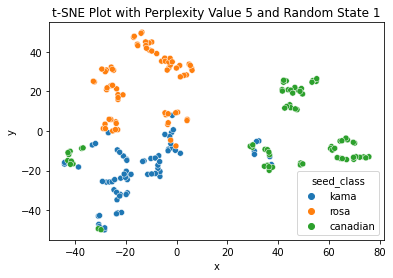

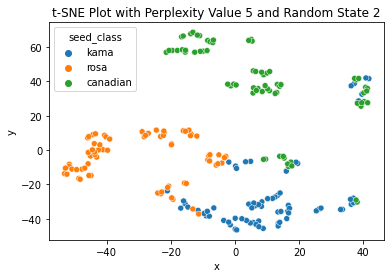

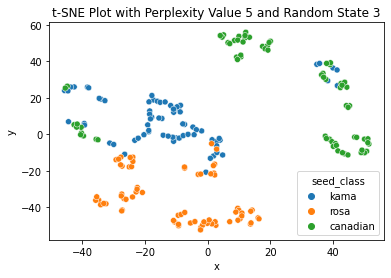

--------------------------------------------


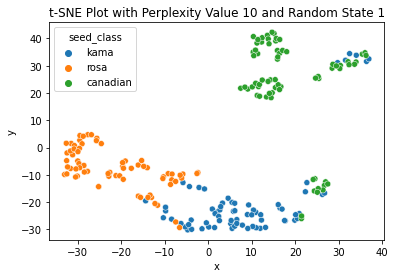

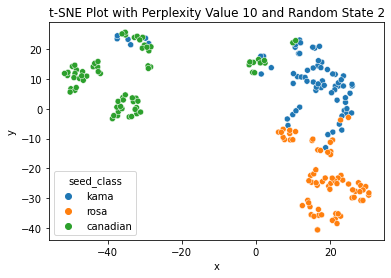

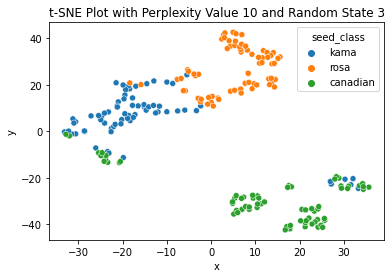

--------------------------------------------


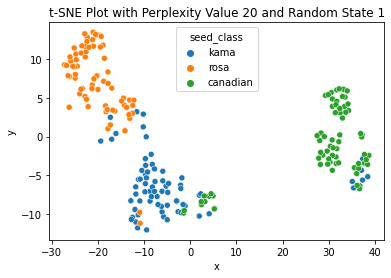

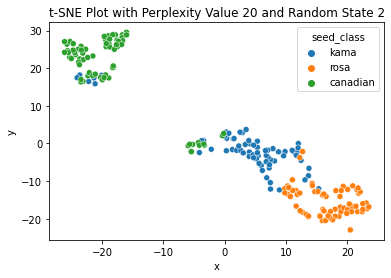

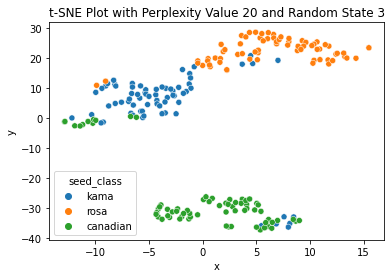

--------------------------------------------


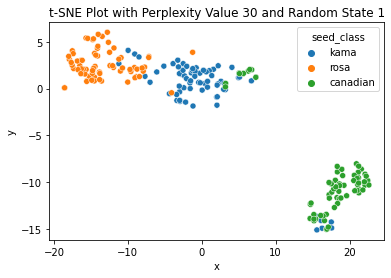

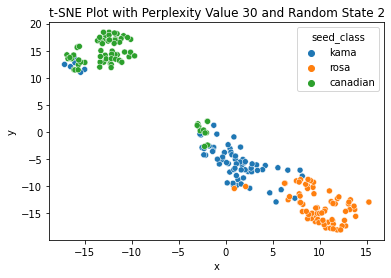

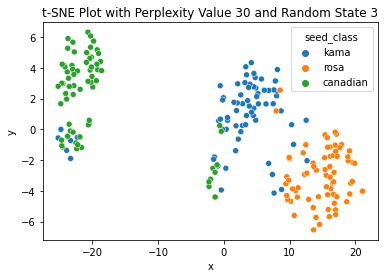

--------------------------------------------


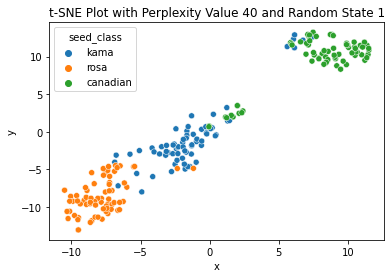

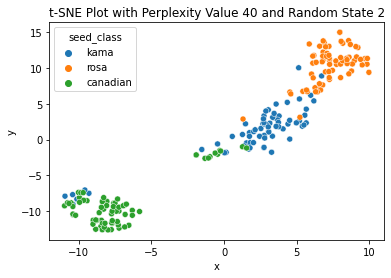

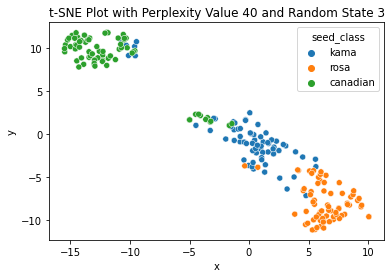

--------------------------------------------


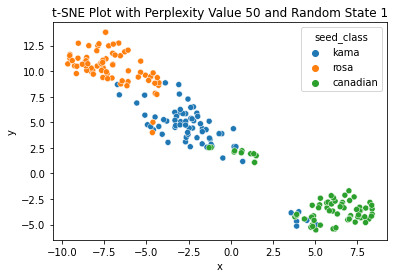

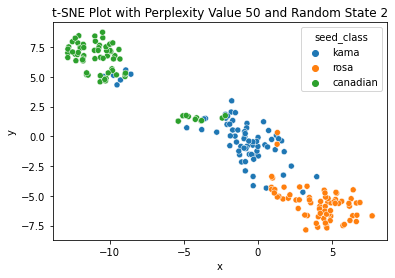

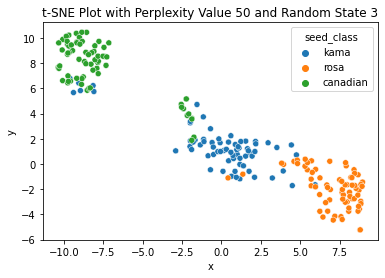

--------------------------------------------


In [256]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2,3]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', hue='seed_class', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 2.2.  Use your t-SNE plots to answer the following questions.

* <u>2.2.1.</u> Do these plots suggest that the scaled dataset is clusterable? Explain.


* <u>2.2.2.</u> How many clusters are in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.3.</u> What are the shapes of the clusters in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.4.</u> Are the clusters in the scaled well-separated? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.5.</u> Are the clusters in the scaled dataset roughly balanced in size? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).




#### 2.2.1 Answer
The plots with a perplexity value of 5 do not show any distinct clustering structure. However, as we increase the perplexity value to 20, we begin to see a clustering structure starting to form. By the time that we increased the perplexity to 30, we see 2 compact, separated clusters forming. Thus, the t-SNE algorithm produce plots that suggests that this scaled dataset is clusterable.

#### 2.2.2 Answer
Subjectively, I will say that there are 2 distinct, compact clusters in the scaled dataset. Looking at the plot with perplexity value 30 and state 1, although the top cluster is showing signs of seperating into 2 clusters, it still doesn't show a clear seperation like the seperation between itself and the bottom right cluster. Combined with the fact that this nature of cluster formation continues for the rest of the perplexitys and states, I want to be conservative and say that there are 2 distinct, compact clusters in the scaled dataset. But speaking non-conservatively, there can be 3 clusters, with more noise between kama and rosa objects to the extent that they overlap.

#### 2.2.3 Answer
The cluster shape in the scaled dataset are non-convext with irregular shape. Such is the case with the 2 non-convext shaped clusters in the plot with perplexity value 30 and state 1.

#### 2.2.4 Answer
The clusters in the scaled dataset are not well-seperated. This is seen in the plot with perplexity value 30 and state 1 as the top clusters are overlapping with one another and doesn't have a clear seperation between them, which conservatively forms a big cluster. 

#### 2.2.5 Answer
It looks like there is are more objects in the bigger cluster than in the smaller cluster. This is the case in the plot with perplexity value 30 and state 1 as the top cluster contains about twice as many objects than the bottom right cluster.

#### 2.3. Pick one t-SNE plot.

Of the plots that you created above, pick a perplexity value and random state that best reflects what you suggested in your answers to the questions in 2.2 and show the corresponding t-SNE plot below.

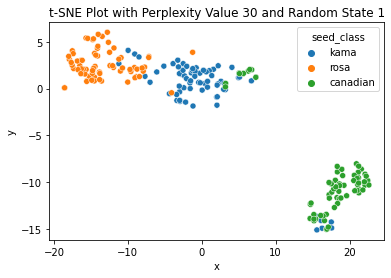

In [257]:
#Create the t-SNE plot projected coordinates
tsne = TSNE(n_components=2, perplexity=30, random_state=1)
data_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df, df_tsne], axis=1)

#Plot the t-SNE projected coordinates
sns.scatterplot(x='x',y='y', hue='seed_class', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 1))
plt.show()

#### 2.4. [1 pt] Underlying Clustering Structure and Seed Class Association

Is there a one-to-one correspondence between the three seed classes and the clusters suggested by the t-SNE algorithm? If not, describe the relationship.

Although most of the seed objects are grouped together by class in the plots, there is not a one-to-one correspondence between the 2 seed classes and the clousters suggested by the t-SNE algorithm because the clusters overlap and form one big cluster containing different objects. This is the case with the plot of perplexity 3 and state 1 where the top cluster contains seed objects of the kama,rosa, and canadian class. 

#### 2.5. Sub-types of Seed Classes

Do you think these plots suggest that there exist different sub-types of seed classes in this dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


Just by looking at the t-SNE plots alone, we are unable to identify if the overlap in clusters are just sub clusters, noise points, or some thing else. We should always remember when using t-SNE plots we can not use them to determine noise in the dataset. 

But what is worth investigating is that in the t-SNE plots, there is a main cluster composed of mostly the kama and rose seed objects with only a handful of canadian seed objects. These canadian seed objects are very distincted seperated in diatance from the main cluster of canadian seed objects, and may be a sub-type of the canadian class since they are distinct from the main canadian class. Also, in the plots there is a cluster made up of mainly the canadian seed objects and mixed with very few of the kama seed objects. This occurrence keeps happening throughout the plots which suggest that there may be a sub-type of kama seed objects that are similar to canadian seed objects.

#### 2.6. Sub-Clusters

Do you think these plots suggest that there may exist a set of "main clusters" in this dataset, and then that some of these "main clusters" may be comprised of smaller "subclusters"? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


I think that there exist a main cluster that is comprised of 2 smaller subclusters. For example, in the plot of perplexity 30 and state 1, the top cluster seems to be a main cluster comprised of mainly the kama and rosa seed objects.

### 3. k-Means Cluster Analysis


#### 3.1. k-means Clustering
Next, cluster your scaled seeds dataset into three clusters (using a random state of 100 and k-means). Then plot your t-SNE plot from 2.3 again, this time color-coding your points by the cluster labels selected by k-means.

In [275]:
kmeans = KMeans(n_clusters=3, random_state=100).fit(X)
df_combo['predicted_cluster']=kmeans.labels_

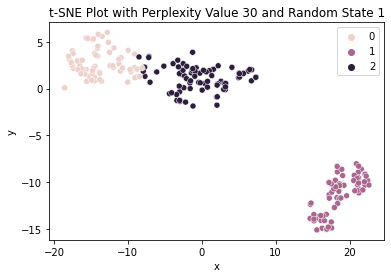

In [276]:
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 1))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### 3.2. Interpretation

To what extent does the clustering suggested by k-means agree with the clustering structure suggested by the t-SNE plot?

The k-means algorithm identified 3 clusters, which is the number of clusters identified by t-SNE plot, speaking non-conservatively. The k-means algorithm also agree with the clustering structure suggested by t-SNE plots in that there's overlap between group 0 and 2, which is the kama and rosa seed class. The k-means algorithm also showed a clear seperation between cluster 1 and the rest of the clusters, which was suggested by the t-SNE plots.

### 4. k-Medoids Cluster Analysis

Next, cluster your scaled seeds dataset into three clusters (using a random state of 100 and k-medoids). Then plot your t-SNE plot from 2.3 again, this time color-coding your points by the cluster labels selected by k-medoids.

#### 4.1. k-medoids Clustering

In [294]:
kmedoids = KMedoids(n_clusters=3).fit(X)
df_combo['predicted_cluster']=kmedoids.labels_

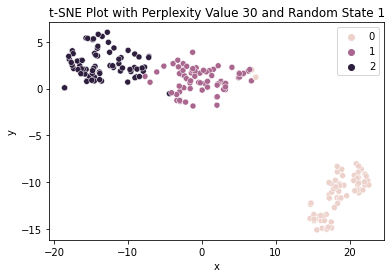

In [295]:
sns.scatterplot(x="x", y="y", hue='predicted_cluster', data=df_combo)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(30, 1))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### 4.2. Interpretation

To what extent does the clustering suggested by k-medoids agree with the clustering structure suggested by the t-SNE plot?

The k-medoids algorithm identified 3 clusters, which is the number of clusters identified by t-SNE plot, speaking non-conservatively. The k-medoids algorithm also agree with the clustering structure suggested by t-SNE plots in that there's small overlap between clusters 1 and 2. The k-means algorithm also showed a clear seperation between cluster 0 and the rest of the clusters, which was suggested by the t-SNE plots. However, in the k-medoids algorithm, a few objects in group 0 is grouped together with group 1. This interesting occurence can be further investigated. But as the k-means algorithm shows a one-to-one correspondence between the three seed classes and the clusters suggested, I would say it is a better algorithm.

## <u>Case Study 2</u>: Using t-SNE Plots for Different Types of Numerical Variables

Recall that the t-SNE algorithm that we have discussed so far is only meant to be used for a purely numerical dataset. Even transforming categorical variables into 0/1 indicator variables may cause your resulting t-SNE plots to lose their interpretative value.

In certain settings, we also need to be careful about using t-SNE plots when using discrete variables as well.

In this case study below we will use the t-SNE algorithm on the following 8 datasets:
* dataset1.csv
* dataset1_integer_x.csv
* dataset2.csv
* dataset2_integer_x.csv
* dataset3.csv
* dataset3_integer_x.csv
* dataset4.csv
* dataset4_integer_x.csv


Each of the **'dataset#.csv'** files contain artificially generated 2 dimensional values that are all continuous. Each of the **'dataset#_integer_x.csv'** files include the same dataset as in the corresponding **'dataset#.csv'**, but the first variable's continuous values have been discretized into integer values.

We will examine each of these datasets with our t-SNE algorithm to build an intution for:
* when the t-SNE algorithm may or may not be reliable in effectively describing the underlying clustering structure of different types of numerical datasets and
* when you should be skeptical about the interpretative value of your t-SNE plots for a high dimensional dataset.

## 1. Dataset 1



### 1.1. Continuous Dataset

#### 1.1.1 t-SNE Plots

First, read the dataset1.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [229]:
X=pd.read_csv('dataset1.csv')
X.head()

,x,y
0,0.176370,-0.875731
1,2.019086,0.747403
2,6.671791,4.686992
3,-0.285181,0.480411
4,4.502273,4.990153


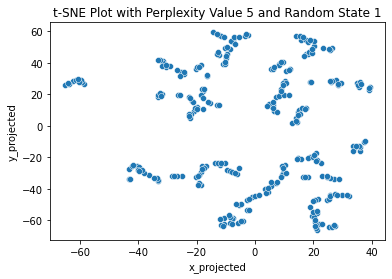

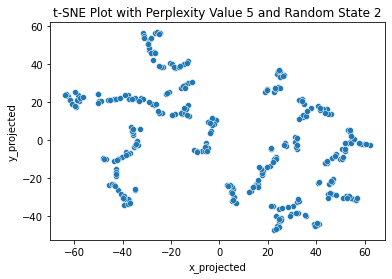

--------------------------------------------


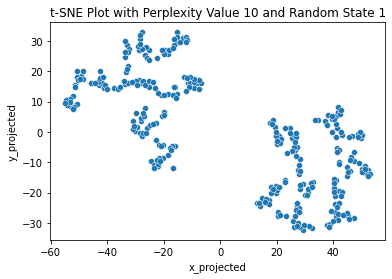

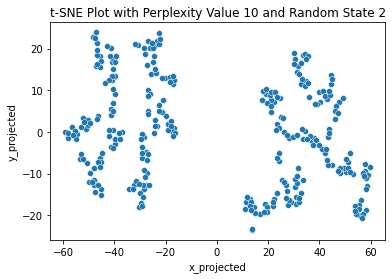

--------------------------------------------


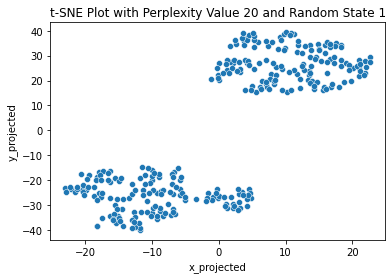

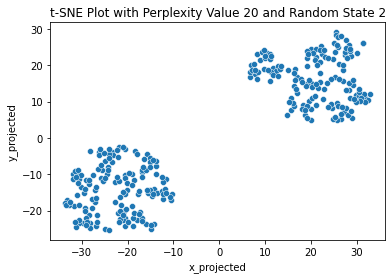

--------------------------------------------


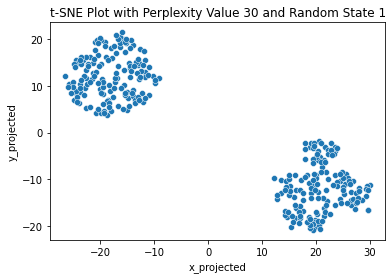

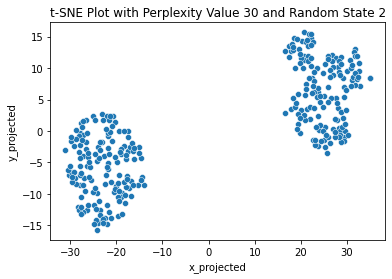

--------------------------------------------


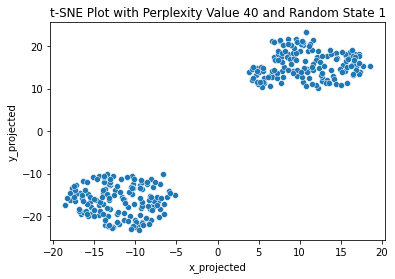

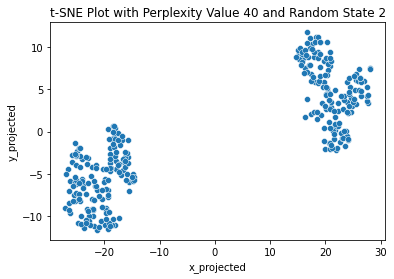

--------------------------------------------


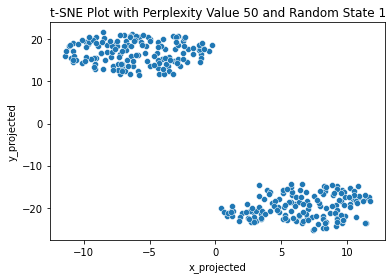

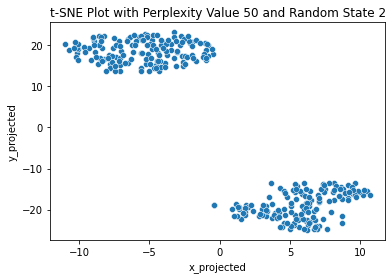

--------------------------------------------


In [230]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 1.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 1.1.2. Answers
1. This dataset is clusterable. A strong indication of cluster structure begin to appear in plots of perplexity 20 and beyond.
2. The dataset has 2 distinct, compact clusters.
3. At least one cluster seems to be spherical. For example, the plot of perplexity 30 and state 1 has a top left cluster that seems to be spherical, while the bottom right cluster is more non-convext.
4. Yes, the clusters seems to be well seperated in plots of perplexity 20 and beyond, with no overlapping of objects from the two distinct clusters.
5. Besides the two main clusters, there is no strong evidence that some of these "main clusters" may be comprised of some "subclusters," since there are no signs of a main cluster seperating into other clusters.

#### 1.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset1 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

No handles with labels found to put in legend.


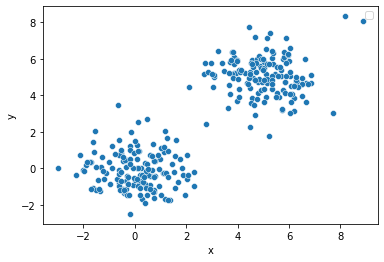

In [231]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data from dataset1.csv is plotted above. There are more outliers and noise in the original plot than in the corresponding t-SNE plot, so my answer about the t-SNE plots showing the dataset to be well-seperated is false. This is because t-SNE plots doesn't accurately capture the euclidean distance of one point in relation to its neighbors because it takes points from a higher dimension and matches it onto a 2D dimension, losing aspects such as the actual euclidean distance between points in the process.



### 1.2. Partially Discretized Dataset

#### 1.2.1 t-SNE Plots

First, read the dataset1_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [245]:
X=pd.read_csv('dataset1_integer_x.csv')
X.head()

,x,y
0,0,-0.875731
1,2,0.747403
2,6,4.686992
3,0,0.480411
4,4,4.990153


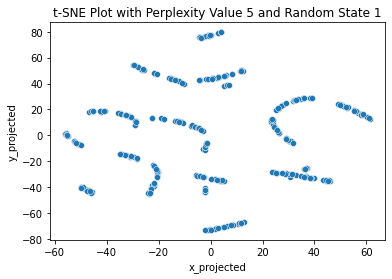

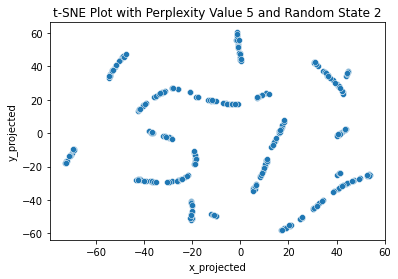

--------------------------------------------


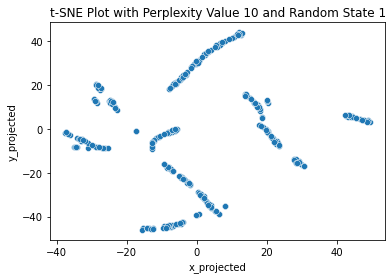

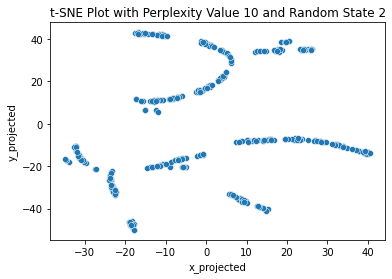

--------------------------------------------


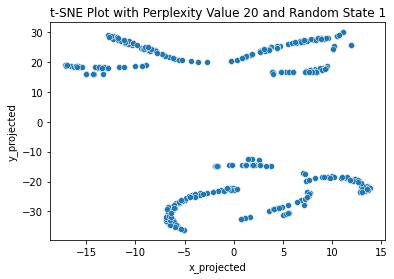

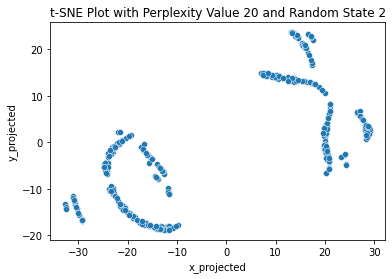

--------------------------------------------


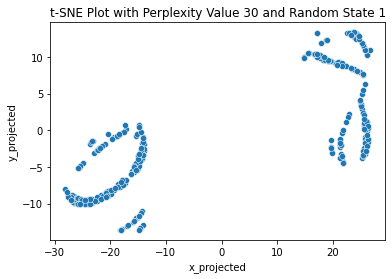

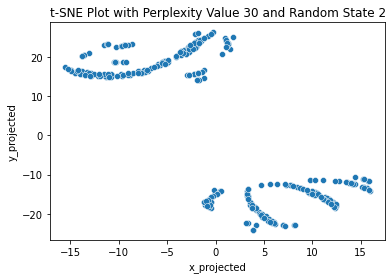

--------------------------------------------


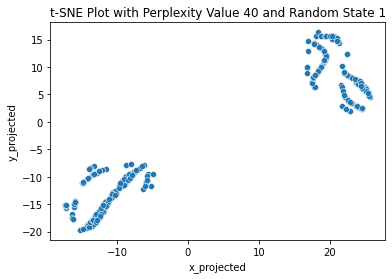

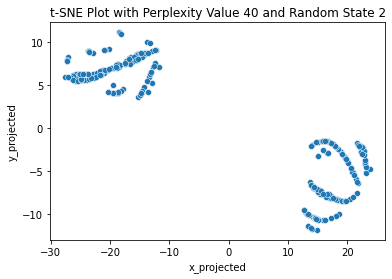

--------------------------------------------


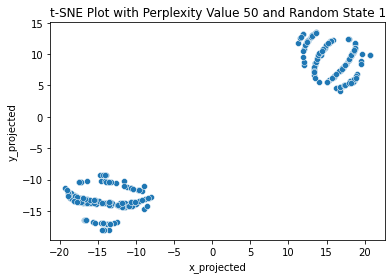

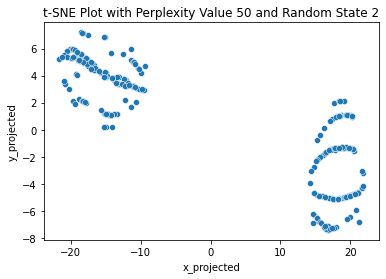

--------------------------------------------


In [243]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 1.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 1.2.2. Answers
1. This dataset is clusterable. A strong indication of cluster structure begin to appear in plots of perplexity 20 and beyond.
2. The dataset has 2 distinct, but no compact clusters.
3. None of the clusters seems to be spherical from the generated t-SNE plots above.
4. Yes, the clusters seems to be well seperated in plots of perplexity 20 and beyond, with no overlapping of objects from the two distinct clusters.
5. There are some evidence that some of these "main clusters" may be comprised of some "subclusters." For example, in the plot of perplexity 50 and state 2, there is a layer of curved datasets that may be a subcluster. But these clouds may also be random noise, and by looking at the t-SNE plots alone, we would be unable to determine if these small mini-clouds of noise points were just sub clusters, noise points, or something else.

#### 1.2.3. Different t-SNE Plots

Plot your original dataset1_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous dataset from 1.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 1.2?
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

No handles with labels found to put in legend.


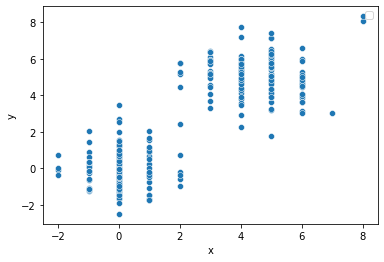

In [246]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data is plotted above. The t-SNE plot for the partially discretized dataset shows that there may be subplots whereas the t-SNE plots for the continuous dataset indicates no signs of subplots. This is because in the original partially discretized dataset, there is a distinct seperation in x-values but the seperation in the y-values are normally distributed, with a greater density of objects in the middle. Therefore when the dimension is reduced in the t-SNE plots, we will see distinct groups of objects with about the same sparsity.

## 2. Dataset 2



### 2.1. Continuous Dataset

#### 2.1.1 t-SNE Plots

First, read the dataset2.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [247]:
X=pd.read_csv('dataset2.csv')
X.head()

,x,y
0,0.176370,-0.875731
1,2.019086,0.747403
2,1.671791,-0.313008
3,-0.285181,0.480411
4,-0.497727,-0.009847


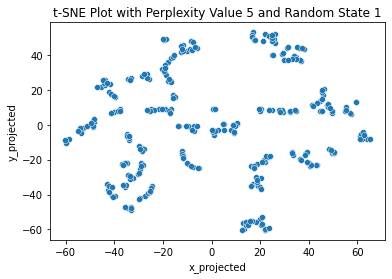

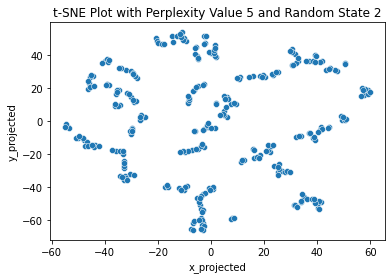

--------------------------------------------


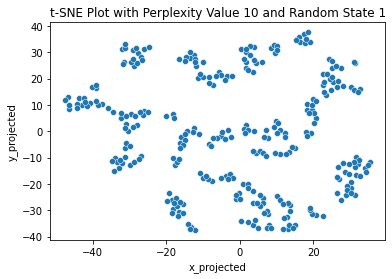

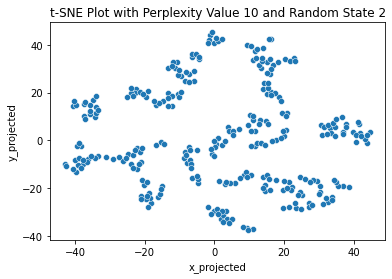

--------------------------------------------


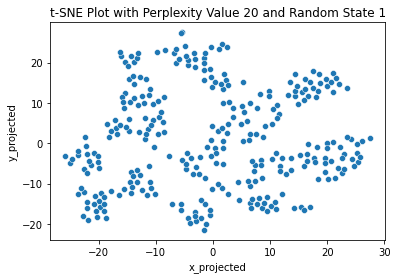

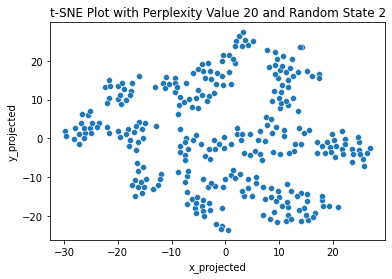

--------------------------------------------


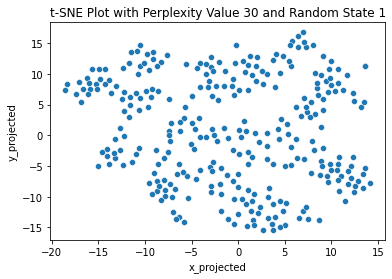

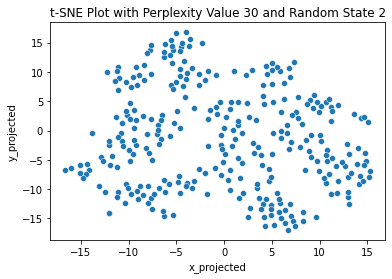

--------------------------------------------


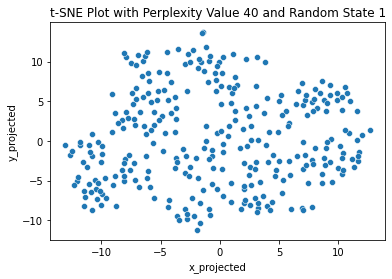

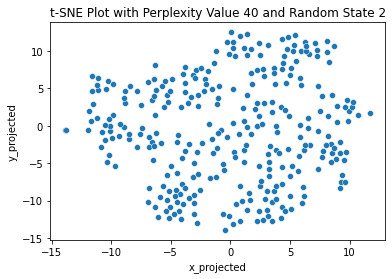

--------------------------------------------


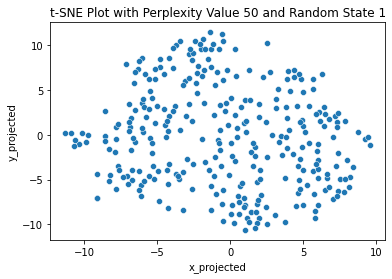

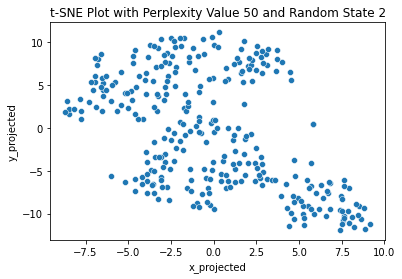

--------------------------------------------


In [238]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 2.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 2.1.2. Answers
1. This dataset is not clusterable. There is no indication of a clustering structure in any of the perplexity plots.
2. The entire dataset is a cluster.
3. The cluster doesn't seem to be spherical from the generated t-SNE plots above.
4. There are no signs of clusters.
5. There are some evidence that some of these "main clusters" may be comprised of some "subclusters." For example, in the plots of perplexity 10 and state 2, the top left strand seems to be seperate from the rest of the objects.

#### 2.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset2 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

No handles with labels found to put in legend.


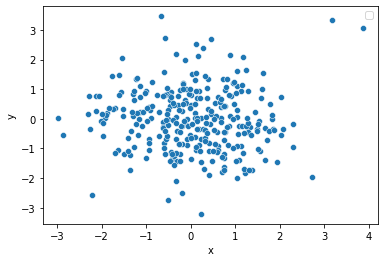

In [248]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original plot confirmed that there is no clustering structure and the entire dataset is just one big plot. The t-SNE is good with checking the number of clusters a dataset has.




### 2.2. Partially Discretized Dataset

#### 2.2.1 t-SNE Plots

First, read the dataset2_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [249]:
X=pd.read_csv('dataset2_integer_x.csv')
X.head()

,x,y
0,0,-0.875731
1,2,0.747403
2,1,-0.313008
3,0,0.480411
4,0,-0.009847


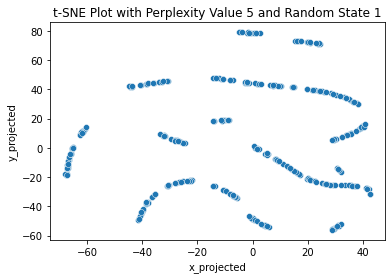

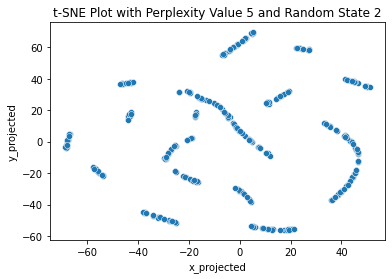

--------------------------------------------


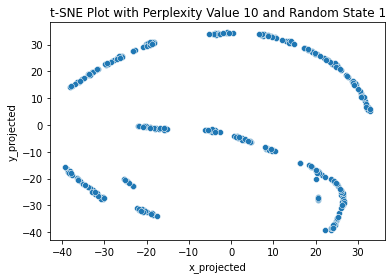

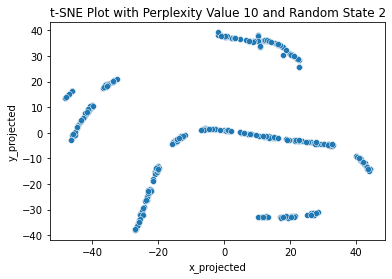

--------------------------------------------


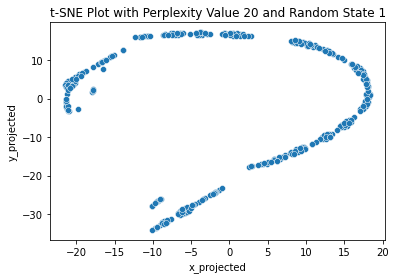

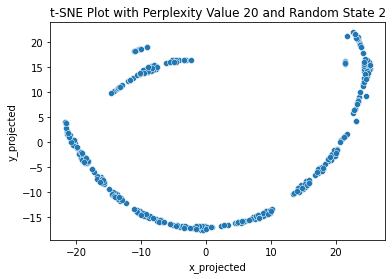

--------------------------------------------


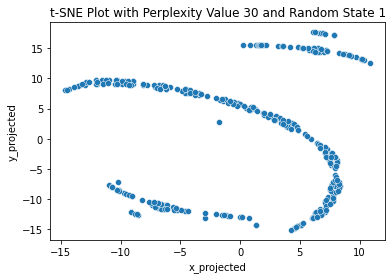

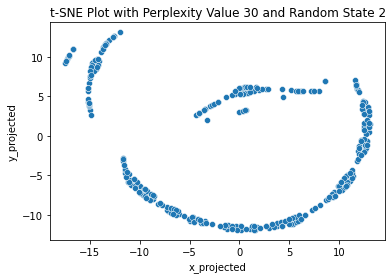

--------------------------------------------


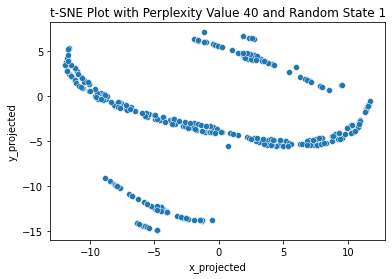

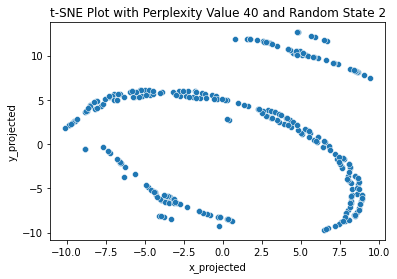

--------------------------------------------


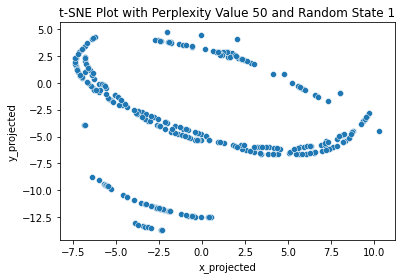

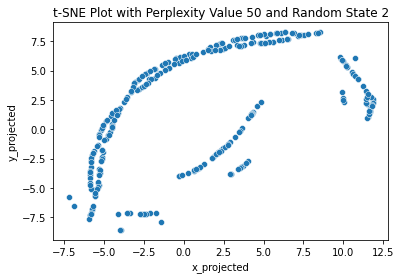

--------------------------------------------


In [250]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 2.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 2.2.2. Answers
1. This dataset is clusterable. An indication of cluster structure begin to appear in plots of perplexity 30.
2. The dataset has 3 distinct clusters, as seen from the plot of perplexity 30.
3. None of the clusters seems to be spherical.
4. No, the clusters don't seem to be well-seperated,. For example, it is hard to tell if the flat line of points on the bottom left belongs to the arch of points above or is it its own cluster.
5. Besides the two main clusters, there is no strong evidence that some of these "main clusters" may be comprised of some "subclusters," since there are no signs of a main cluster seperating into other clusters.

#### 2.2.3. Different t-SNE Plots

Plot your original dataset2_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 2.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 2.2? 
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

No handles with labels found to put in legend.


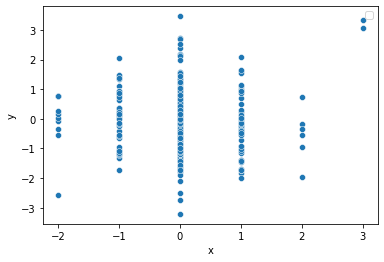

In [251]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data is plotted above. The t-SNE plot for the partially discretized dataset shows that there are 3 clusters whereas the t-SNE plots for the continuous dataset indicates there is no clustering structure. This is because in the original partially discretized dataset, there is a distinct seperation in x-values but the seperation in the y-values are normally distributed, with a greater density of objects in the middle. Therefore when the dimension is reduced in the t-SNE plots, we will see distinct groups of objects with about the same sparsity. Whereas on the other hand, the original continuous dataset has x and y values that are spread out randomly, so when mapped onto a lower dimension these objects shows no signs of clustering.

## 3. Dataset 3



### 3.1. Continuous Dataset

#### 3.1.1 t-SNE Plots

First, read the dataset3.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [305]:
X=pd.read_csv('dataset3.csv')
X.head()

,x,y
0,1.763705,-8.757308
1,20.190861,7.474034
2,16.717912,-3.130077
3,-2.851809,4.804114
4,-4.977267,-0.098473


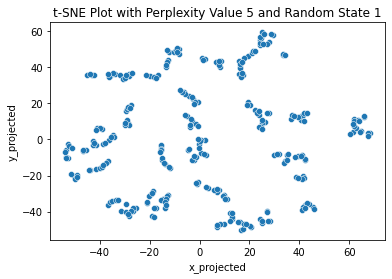

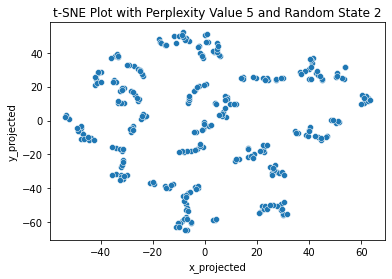

--------------------------------------------


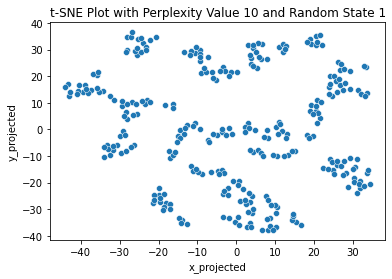

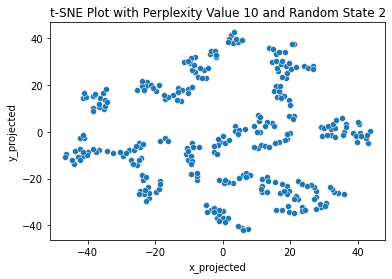

--------------------------------------------


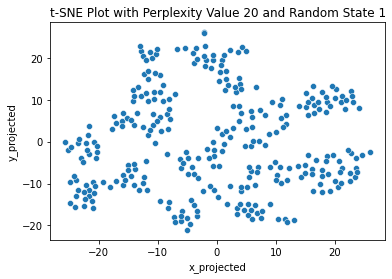

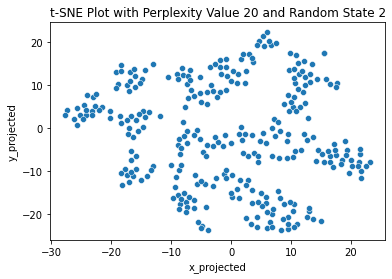

--------------------------------------------


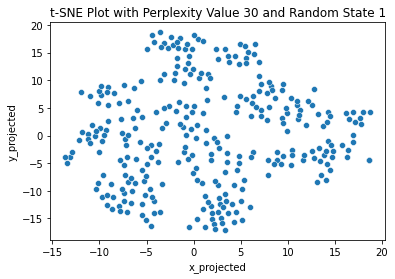

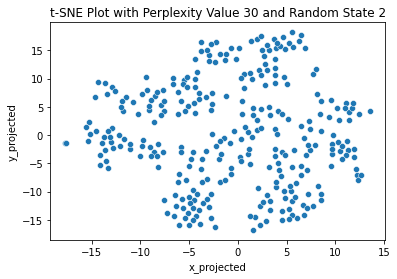

--------------------------------------------


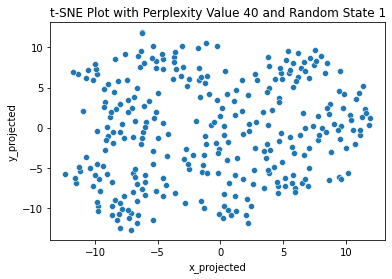

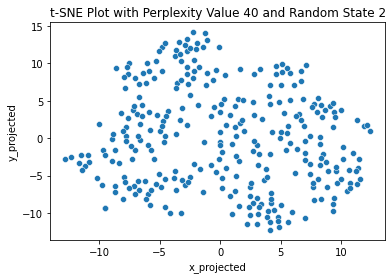

--------------------------------------------


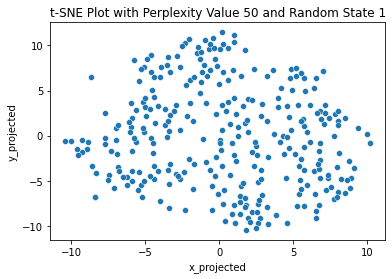

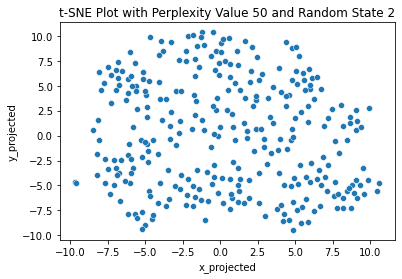

--------------------------------------------


In [306]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 3.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 3.1.2. Answers
1. This dataset is clusterable. An indication of cluster structure begin to appear in plots of perplexity 10.
2. The dataset has at least 2 clusters, as seen from plot of perplexity 10, state 1 that has a top flat cluster seperated from the rest of the objects.
3. None of the clusters seem to be spherical.
4. The clusters don't seem to be well-clustered, since there are a lot of overlap from the t-SNE plots.
5. Besides the two main clusters, there is a strong evidence that some of these "main clusters" may be comprised of some "subclusters." For example, in plot of perplexity 10 and state 1, the bottom main cluster seems to have a lower right cluster that is seperate and distinct from the rest of the objects in this bottom cluster.

#### 3.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset3 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

No handles with labels found to put in legend.


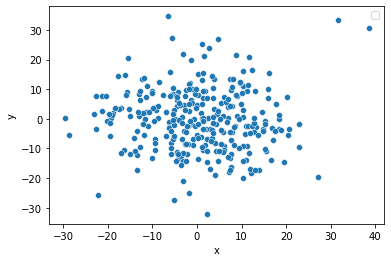

In [308]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original plot shows that there is no clustering structure and the entire dataset is just one big cluster. So, I was wrong in saying that there is a clustering structure and dataset 3 has clusters. This is because t-SNE plots doesn't accurately capture the euclidean distance of one point in relation to its neighbors because it takes points from a higher dimension and matches it onto a 2D dimension, losing aspects such as the actual euclidean distance between points in the process.



### 3.2. Partially Discretized Dataset

#### 3.2.1 t-SNE Plots

First, read the dataset3_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [302]:
X=pd.read_csv('dataset3_integer_x.csv')
X.head()

,x,y
0,1,-8.757308
1,20,7.474034
2,16,-3.130077
3,-2,4.804114
4,-4,-0.098473


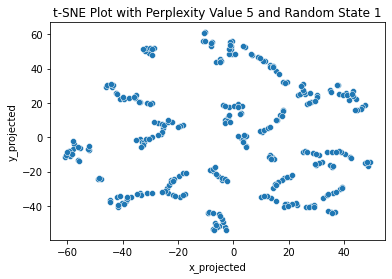

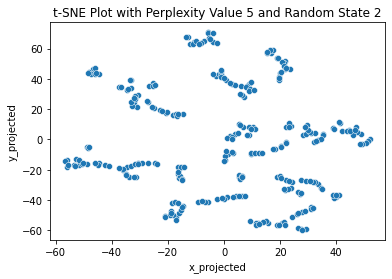

--------------------------------------------


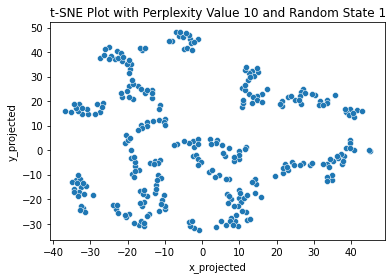

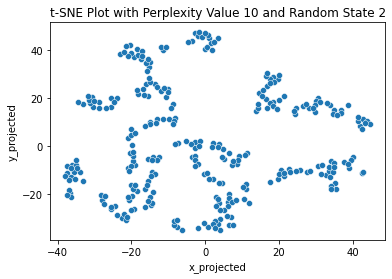

--------------------------------------------


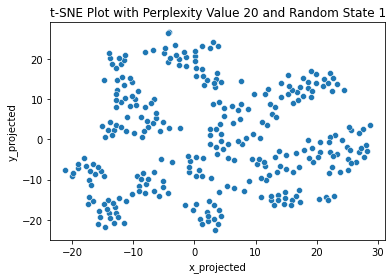

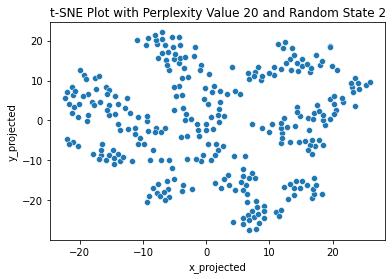

--------------------------------------------


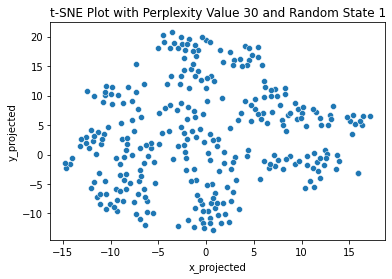

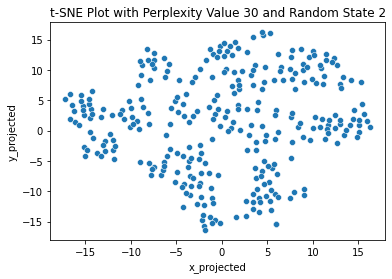

--------------------------------------------


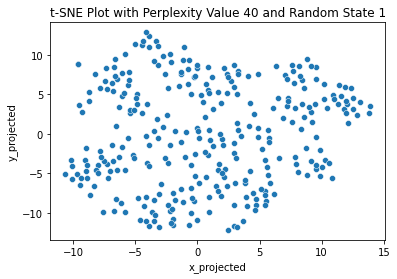

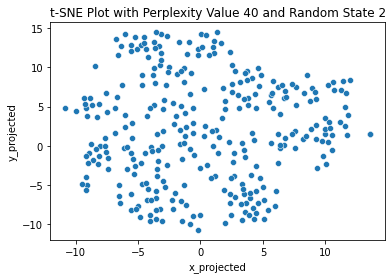

--------------------------------------------


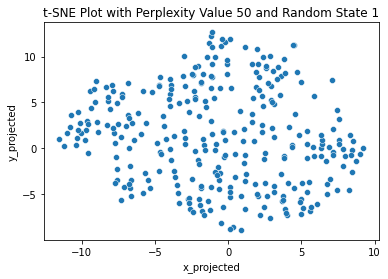

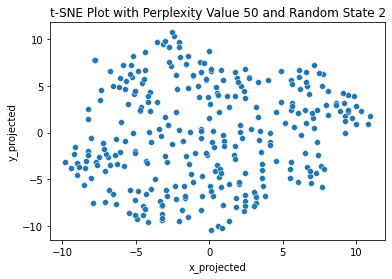

--------------------------------------------


In [303]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 3.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 3.2.2. Answers
1. This dataset is clusterable. An indication of small cluster appears in perplexity 5.
2. The dataset has multiple small clusters as seen in perplexity 5 plots, but they are not compact.
3. None of the clusters seems to be spherical from the generated t-SNE plots above.
4. No, the clusters do not seem to be well-seperated since they have many overlaps with one another.
5. There are some evidence that some of these "main clusters" may be comprised of some "subclusters." For example, in the plot of perplexity 5 and state 1, there are a lot of subclusters that are distinct from other objects in distance.

#### 3.2.3. Different t-SNE Plots

Plot your original dataset3_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 3.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 3.2? 
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

No handles with labels found to put in legend.


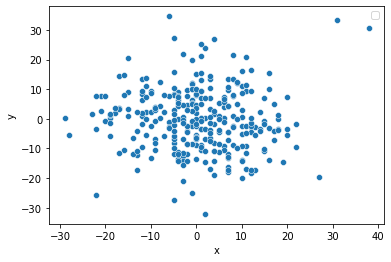

In [304]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data is plotted above. The t-SNE plot for the partially discretized dataset and the t-SNE plots for the continuous dataset both indicates no clustering. This is because in the original partially discretized dataset and the original continuous dataset the data is spread out randomly in the x and y axis.

## 4. Dataset 4



### 4.1. Continuous Dataset

#### 4.1.1 t-SNE Plots

First, read the dataset4.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [319]:
X=pd.read_csv('dataset4.csv')
X.head()

,x,y
0,1.763705,-8.757308
1,20.190861,7.474034
2,56.717912,36.869923
3,-2.851809,4.804114
4,35.022733,39.901527


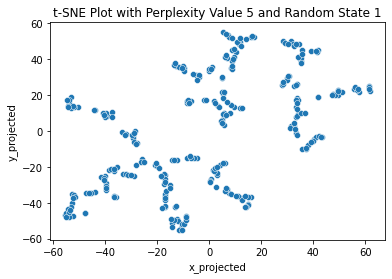

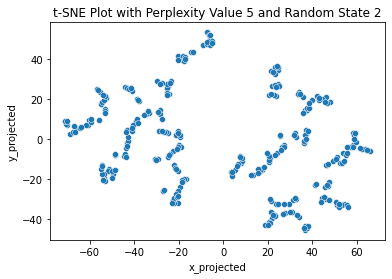

--------------------------------------------


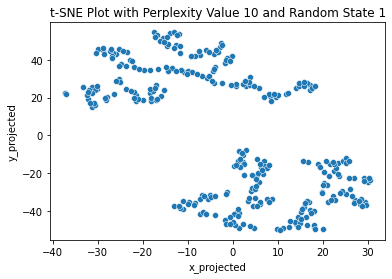

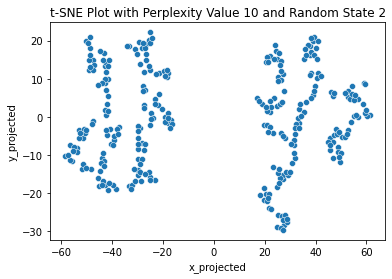

--------------------------------------------


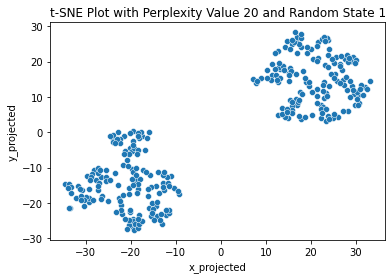

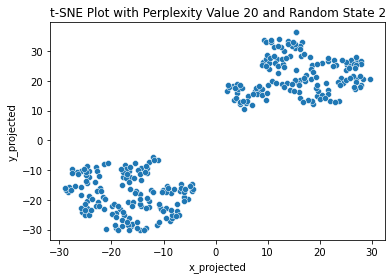

--------------------------------------------


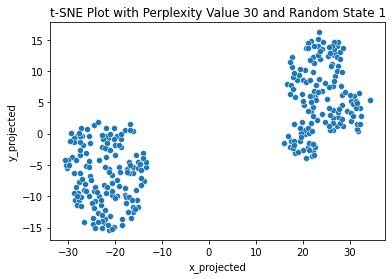

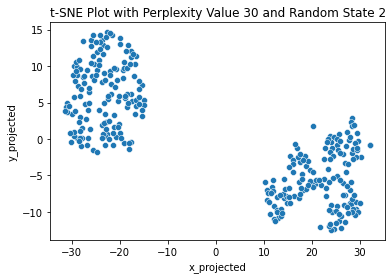

--------------------------------------------


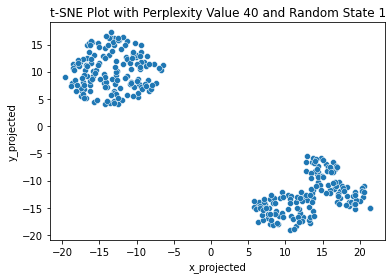

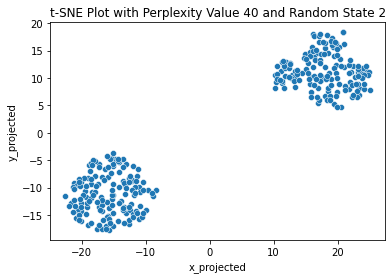

--------------------------------------------


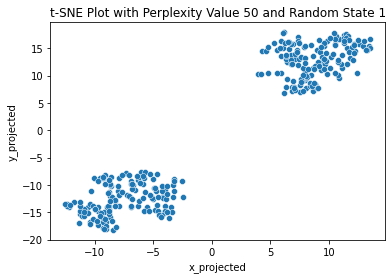

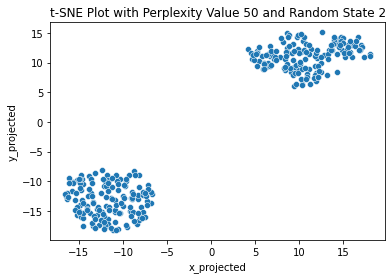

--------------------------------------------


In [310]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 4.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 4.1.2. Answers
1. This dataset is clusterable. A strong indication of cluster structure begin to appear in plots of perplexity 10 and beyond.
2. The dataset has 2 distinct, compact clusters.
3. At least one cluster seems to be spherical. For example, the plot of perplexity 40 and state 2 has a bottom left cluster that seems to be spherical, while the top right cluster is more non-convext.
4. Yes, the clusters seems to be well seperated in plots of perplexity 20 and beyond, with no overlapping of objects from the two distinct clusters.
5. Besides the two main clusters, there is no strong evidence that some of these "main clusters" may be comprised of some "subclusters," since there are no signs of a main cluster seperating into other clusters.


#### 4.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset4 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

No handles with labels found to put in legend.


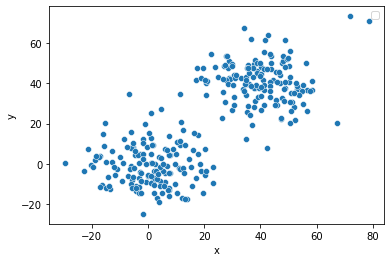

In [320]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data from dataset4.csv is plotted above. There are more outliers and noise in the original plot than in the corresponding t-SNE plot, so my answer about the t-SNE plots showing the dataset to be well-seperated is false. This is because t-SNE plots doesn't accurately capture the euclidean distance of one point in relation to its neighbors because it takes points from a higher dimension and matches it onto a 2D dimension, losing aspects such as the actual euclidean distance between points in the process.



### 4.2. Partially Discretized Dataset

#### 4.2.1 t-SNE Plots

First, read the dataset4_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

In [321]:
X=pd.read_csv('dataset4_integer_x.csv')
X.head()

,x,y
0,1,-8.757308
1,20,7.474034
2,56,36.869923
3,-2,4.804114
4,35,39.901527


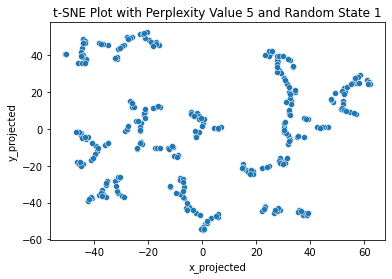

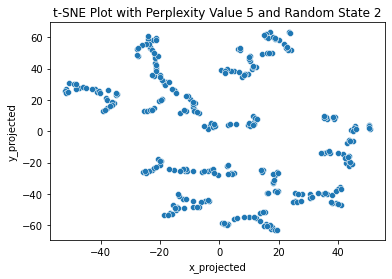

--------------------------------------------


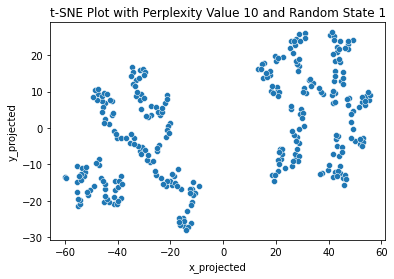

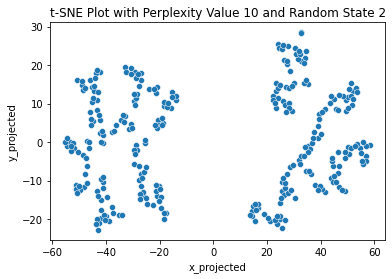

--------------------------------------------


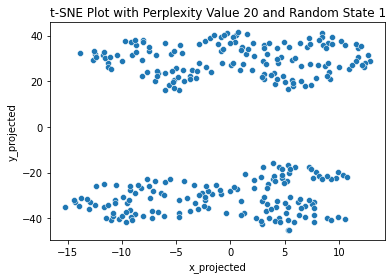

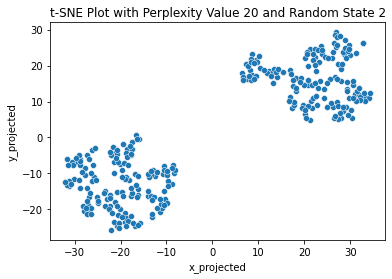

--------------------------------------------


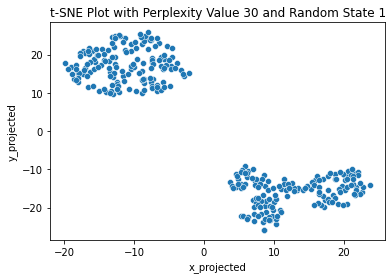

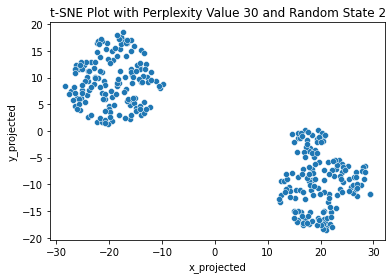

--------------------------------------------


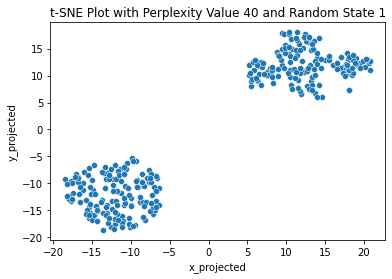

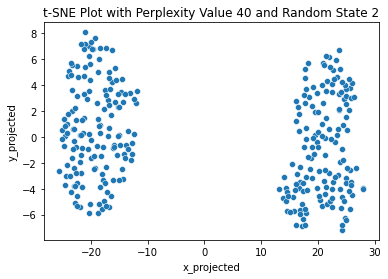

--------------------------------------------


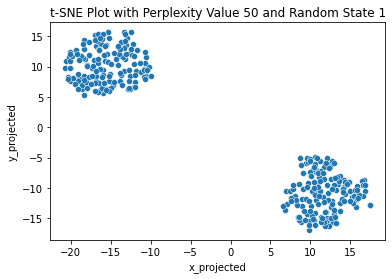

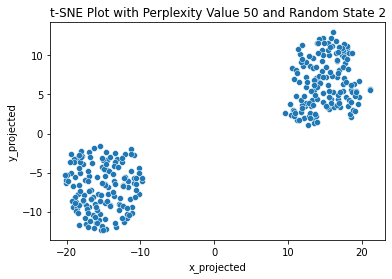

--------------------------------------------


In [312]:
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1,2]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
    print('--------------------------------------------')

#### 4.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#### 4.2.2. Answers
1. This dataset is clusterable. A strong indication of cluster structure begin to appear in plots of perplexity 20 and beyond.
2. The dataset has 2 distinct, compact clusters.
3. At least one cluster seems to be spherical. For example, the plot of perplexity 30 and state 2 has a top left cluster that seems to be spherical, while the bottom right cluster is more non-convext.
4. Yes, the clusters seems to be well seperated in plots of perplexity 30 and beyond, with no overlapping of objects from the two distinct clusters.
5. Besides the two main clusters, there is no strong evidence that some of these "main clusters" may be comprised of some "subclusters," since there are no signs of a main cluster seperating into other clusters.



#### 4.2.3. Different t-SNE Plots

Plot your original dataset4_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous datast from 4.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 4.2? If so, explain why you may have had different interpretation and/or seen different t-SNE plots.

No handles with labels found to put in legend.


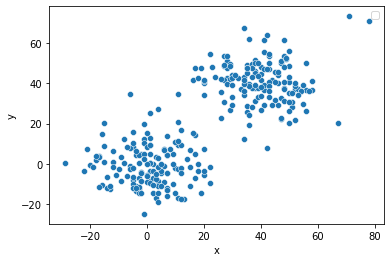

In [322]:
sns.scatterplot(x="x", y="y", data=X)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The original data is plotted above. The t-SNE plot for the partially discretized dataset and the t-SNE plots for the continuous dataset both indicate that there are 2 clusters. This is correctly reflected in the original plots. But the t-SNE plots for the continuous dataset indicates that the 2 clusters are well-seperated and compact while in the original dataset they are not. This is because when the dimensionality is reduced, the euclidian distance is not reflected well in the t-SNE plots.